In [ ]:
#Load all libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import time


# Set display options for pandas
display_options = {
    'display.max_columns': None,
    'display.width': 1000,
}
for option, value in display_options.items():
    pd.set_option(option, value)

# Set seaborn style for visualization
sns.set_style("darkgrid")

# Check TensorFlow and Keras versions
# Check TensorFlow and Keras versions
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.version.VERSION)

TensorFlow version: 2.18.0
Keras version: 2.18.0


In [ ]:
# Load dataset
# Step 2: Load the phishing website dataset
dataset_path = "/content/dataset_full.csv"
data = pd.read_csv(dataset_path)

# Display basic information about the dataset
print("Dataset loaded successfully!")
print("Dataset shape:", data.shape)
print("First five rows:")
print(data.head())

Dataset loaded successfully!
Dataset shape: (44509, 112)
First five rows:
   qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  qty_exclamation_url  qty_space_url  qty_tilde_url  qty_comma_url  qty_plus_url  qty_asterisk_url  qty_hashtag_url  qty_dollar_url  qty_percent_url  qty_tld_url  length_url  qty_dot_domain  qty_hyphen_domain  qty_underline_domain  qty_slash_domain  qty_questionmark_domain  qty_equal_domain  qty_at_domain  qty_and_domain  qty_exclamation_domain  qty_space_domain  qty_tilde_domain  qty_comma_domain  qty_plus_domain  qty_asterisk_domain  qty_hashtag_domain  qty_dollar_domain  qty_percent_domain  qty_vowels_domain  domain_length  domain_in_ip  server_client_domain  qty_dot_directory  qty_hyphen_directory  qty_underline_directory  qty_slash_directory  qty_questionmark_directory  qty_equal_directory  qty_at_directory  qty_and_directory  qty_exclamation_directory  qty_space_directory  qty_tilde_

<ipython-input-3-14b4364f3bc6>:4: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(dataset_path)


In [ ]:
# Step 3: Preprocess the dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Handle missing values
data = data.dropna()

# Remove duplicate rows
data = data.drop_duplicates()

# Convert boolean features to integer
boolean_columns = ['email_in_url', 'domain_in_ip', 'server_client_domain', 'tld_present_params', 'domain_spf', 'tls_ssl_certificate', 'url_google_index', 'domain_google_index', 'url_shortened', 'phishing']
data[boolean_columns] = data[boolean_columns].astype(int)

# Identify numerical columns
numerical_columns = [col for col in data.columns if col not in boolean_columns]

# Standardize numerical features using StandardScaler
scaler_standard = StandardScaler()
data[numerical_columns] = scaler_standard.fit_transform(data[numerical_columns])

# Normalize numerical features using MinMaxScaler
scaler_minmax = MinMaxScaler()
data[numerical_columns] = scaler_minmax.fit_transform(data[numerical_columns])

# Save the cleaned dataset as newphishdata.csv
cleaned_dataset_path = "newphishdata.csv"
data.to_csv(cleaned_dataset_path, index=False)

print("Dataset preprocessing completed. Cleaned dataset saved as", cleaned_dataset_path)



<ipython-input-4-40d0bd05b13f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[boolean_columns] = data[boolean_columns].astype(int)


Dataset preprocessing completed. Cleaned dataset saved as newphishdata.csv



Summary Statistics:
        qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  qty_exclamation_url  qty_space_url  qty_tilde_url  qty_comma_url  qty_plus_url  qty_asterisk_url  qty_hashtag_url  qty_dollar_url  qty_percent_url   qty_tld_url    length_url  qty_dot_domain  qty_hyphen_domain  qty_underline_domain  qty_slash_domain  qty_questionmark_domain  qty_equal_domain  qty_at_domain  qty_and_domain  qty_exclamation_domain  qty_space_domain  qty_tilde_domain  qty_comma_domain  qty_plus_domain  qty_asterisk_domain  qty_hashtag_domain  qty_dollar_domain  qty_percent_domain  qty_vowels_domain  domain_length  domain_in_ip  server_client_domain  qty_dot_directory  qty_hyphen_directory  qty_underline_directory  qty_slash_directory  qty_questionmark_directory  qty_equal_directory  qty_at_directory  qty_and_directory  qty_exclamation_directory  qty_space_directory  qty_tilde_directory  qty_comma_directory  qty_plus_d

<ipython-input-5-69696e36bbf0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='phishing', data=data, palette='coolwarm')


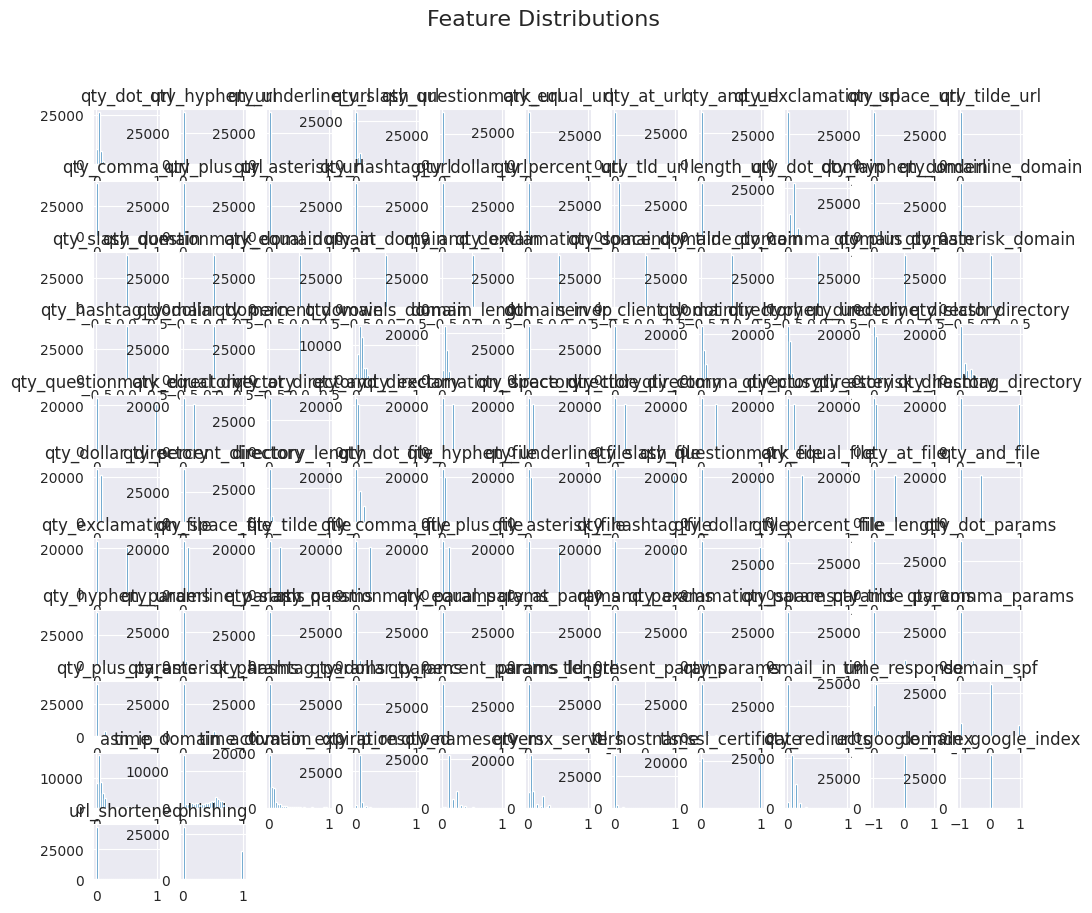

In [ ]:
# Step 4: Exploratory Data Analysis (EDA)
# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Plot distribution of phishing vs. legitimate websites
plt.figure(figsize=(6,4))
sns.countplot(x='phishing', data=data, palette='coolwarm')
plt.title("Distribution of Phishing vs. Legitimate Websites")
plt.xlabel("Class (0 = Legitimate, 1 = Phishing)")
plt.ylabel("Count")
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Visualize feature distributions
data.hist(figsize=(12,10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [ ]:
# Step 5: Split the dataset into training (80%) and testing (20%) sets
X = data.drop(columns=['phishing'])  # Features
y = data['phishing']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dataset successfully split into training and testing sets.")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Dataset successfully split into training and testing sets.
Training set shape: (35224, 111)
Testing set shape: (8807, 111)


BiLSTM: Captures both past and future dependencies in sequences.

GRU: Reduces computational complexity while maintaining good performance.

In [ ]:
import numpy as np

# Convert DataFrame to NumPy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Reshape for LSTM/GRU (samples, timesteps=1, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (35224, 1, 111)
X_test shape: (8807, 1, 111)


In [ ]:
from tensorflow.keras.layers import Bidirectional, GRU, LSTM
from tensorflow.keras.optimizers import Adam

# Initialize Sequential Model
model = Sequential()

# BiLSTM Layer
model.add(Bidirectional(LSTM(units=64, return_sequences=True, input_shape=(1, X_train.shape[2]))))
model.add(Dropout(0.3))

# GRU Layer
model.add(GRU(units=32, return_sequences=False))
model.add(Dropout(0.3))

# Fully Connected Layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the Model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8780 - loss: 0.3059 - val_accuracy: 0.9278 - val_loss: 0.1867
Epoch 2/50
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9194 - loss: 0.1991 - val_accuracy: 0.9110 - val_loss: 0.2078
Epoch 3/50
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9219 - loss: 0.1904 - val_accuracy: 0.9240 - val_loss: 0.1772
Epoch 4/50
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9254 - loss: 0.1831 - val_accuracy: 0.9253 - val_loss: 0.1755
Epoch 5/50
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9248 - loss: 0.1844 - val_accuracy: 0.9279 - val_loss: 0.1720
Epoch 6/50
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9266 - loss: 0.1821 - val_accuracy: 0.9307 - val_loss: 0.1675
Epoch 7/50
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9255 - loss: 0.1822 - val_accuracy: 0.9255 - val_loss: 0.1756
Epoch 8/50
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9277 - loss: 0.1761 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Get predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("\nBiLSTM + GRU Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC Score: {auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

BiLSTM + GRU Model Evaluation:
Accuracy: 0.9544
Precision: 0.9323
Recall: 0.9372
AUC Score: 0.9504
Confusion Matrix:
[[5527  209]
 [ 193 2878]]


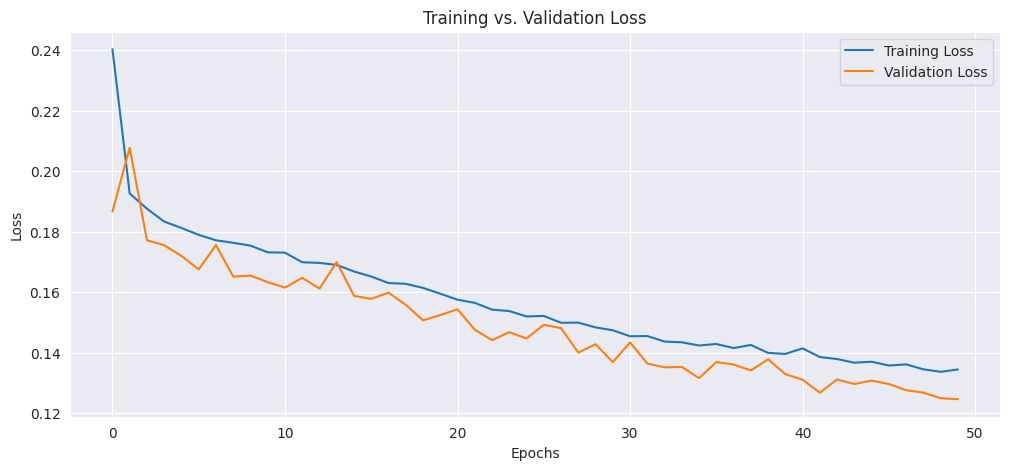

In [ ]:
import matplotlib.pyplot as plt

# Plot Training Accuracy vs. Validation Accuracy
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs. Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot Training Loss vs. Validation Loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs. Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Save the trained model
model.save("bilstm_gru_phishing_model.h5")

In [ ]:
# If X_train is 3D, reshape to 2D before scaling
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Initialize and fit the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

# Reshape back to 3D for LSTM/GRU input
X_train = X_train_scaled.reshape(X_train.shape[0], 1, -1)
X_test = X_test_scaled.reshape(X_test.shape[0], 1, -1)

In [ ]:
# Save the scaler for future use
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
from tensorflow.keras.models import load_model
import joblib

# Load trained BiLSTM-GRU model
model = load_model("/content/bilstm_gru_phishing_model.h5")

# Load the saved scaler
scaler = joblib.load("scaler.pkl")

In [ ]:
def extract_features(url):
    features = []
    features.append(len(url))  # URL length
    features.append(url.count('.'))  # Number of dots (subdomains)
    features.append(1 if url.startswith("https") else 0)  # HTTPS presence
    return np.array(features).reshape(1, -1)

user_url = input("Enter a URL: ")
features = extract_features(user_url)

Enter a URL: https://paypal.com/login


In [ ]:
new_data = pd.read_csv("/content/newphishdata.csv")
features = new_data.iloc[:, :-1].values  # Exclude labels

In [ ]:
features_scaled = scaler.transform(features)  # Apply the same scaling
features_reshaped = features_scaled.reshape(features.shape[0], 1, -1)  # Reshape for LSTM/GRU

In [ ]:
# Get the prediction from the model
prediction = model.predict(features_reshaped)

# Convert the NumPy array output into a single scalar value
predicted_value = prediction[0][0]  # Extract the first element

# Use the threshold (0.5) to classify as phishing or legitimate
result = "Phishing" if predicted_value > 0.5 else "Legitimate"

print("\nPrediction:", result)


1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

Prediction: Legitimate
